In [169]:
import numpy as np
import matplotlib.pyplot as plt

In [186]:
# Constants
T =365.25 # period in days
A_0 = (np.pi/180)*75 # angle of spring equinox in radians
e = 0.01671 # eccentricity of orbit
tilt = (np.pi/180)*23.5 # axial tilt in radians
w = 2*np.pi/T # average angular velocity

In [213]:
# Simulation parameters
dt = 0.01  # time step
t_max = T  # maximum simulation time

In [214]:
# Arrays to store the time
t_values = np.arange(0, t_max, dt)

In [215]:
# Arrays to store position
orbit = np.zeros((len(t_values), 1)) # stores the position of earth in orbit
position = np.zeros((len(t_values), 2)) # stores A and a values for each time step

In [216]:
# Initial parameters for position
r_0  = np.array([0, 0])  # initial A and a

In [217]:
# Setting the conditions into arrays
orbit[0,:] = A_0
position[0,:] = r_0

In [218]:
# Defining the rate of change of position
def v(x):
    return 2*np.pi/(T*(1-2*e*np.cos(x)))

In [221]:
# Numerical Integration loop
for i in range(0,len(t_values)-1):
    orbit_mid = orbit[i,0] + 0.5*v(orbit[i,0])*dt
    orbit[i+1,0] = orbit[i,0] + v(orbit_mid)*dt
    rel_pos = orbit[i,0] - orbit[0,0]
    position[i,1] = np.array([np.arcsin(np.sin(tilt)*np.sin(rel_pos))])
    if rel_pos <= np.pi:
        position[i,0] = np.array([+ np.arccos(np.cos(rel_pos)/np.cos(position[i,1])) - w*t_values[i]])
    if rel_pos > np.pi:
        position[i,0] = np.array([- np.arccos(np.cos(rel_pos)/np.cos(position[i,1])) - w*t_values[i] + 2*np.pi])                        

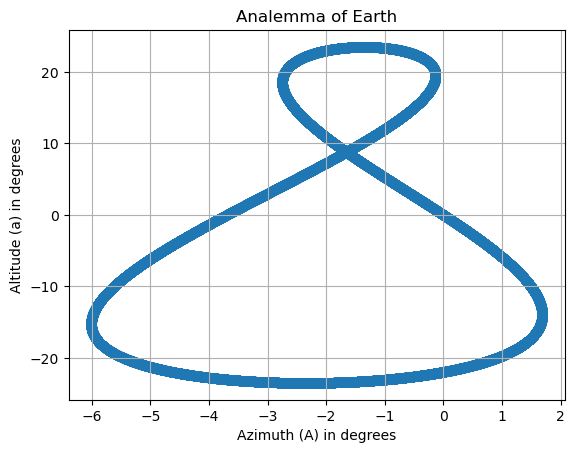

In [223]:
# Plotting the trajectory
plt.scatter((180/np.pi)*position[:, 0], (180/np.pi)*position[:, 1])
plt.title("Analemma of Earth")
plt.xlabel("Azimuth (A) in degrees")
plt.ylabel("Altitude (a) in degrees")
plt.grid(True)